In [1]:
# IMPORT PACKAGES
from em_examples.Base import widgetify
import em_examples.InductionLoop as IND
from ipywidgets import interact, FloatSlider, FloatText

Efficiency Warning: Interpolation will be slow, use setup.py!

            python setup.py build_ext --inplace
    


## Parameter Descriptions

<img style="float: right; width: 500px" src="https://github.com/geoscixyz/em_apps/blob/master/images/InductionLoop.png?raw=true">

Below are the adjustable parameters for widgets within this notebook:

* $I_p$: Transmitter current amplitude [A]
* $a_{Tx}$: Transmitter loop radius [m]
* $a_{Rx}$: Receiver loop radius [m]
* $x_{Rx}$: Receiver x position [m]
* $z_{Rx}$: Receiver z position [m]
* $\theta$: Receiver normal vector relative to vertical [degrees]
* $R$: Resistance of receiver loop [$\Omega$]
* $L$: Inductance of receiver loop [H]
* $f$: Specific frequency [Hz]
* $t$: Specific time [s]

## Supporting Mathematical Theory

Consider a transmitter loop which carries a primary current of the form:
\begin{equation}
I_p(t) = I_p \, u(-t)
\end{equation}
where $u(t)$ is the unit-step function. According to the Biot-Savart law, this results in a primary magnetic field:
\begin{equation}
\mathbf{B_p} (\mathbf{r},t) = I_p \, \boldsymbol{\beta} \, t(-t)  \;\;\;\; \textrm{where} \;\;\;\;\; \boldsymbol{\beta} = \frac{\mu_0}{4 \pi} \int_C \frac{d \mathbf{l} \times \mathbf{r'}}{|\mathbf{r'}|^2}
\end{equation}
where $\boldsymbol{\beta}$ contains the problem geometry. Assume the magnetic field is homogeneous through the receiver loop. The primary field generates an EMF within the receiver loop equal to:
\begin{equation}
EMF = - i\omega \Phi \;\;\;\;\; \textrm{where} \;\;\;\;\; \Phi = I_p A \beta_n \, u(-t)
\end{equation}
where $A$ is the area of the receiver loop and $\beta_n$ is the component of $\boldsymbol{\beta}$ along $\hat n$. The EMF induces a secondary current $I_s$ within the receiver loop. Instead of solving the problem directly in the time-domain, we will apply the inverse Fourier transform to frequency-domain solutions. The secondary current induced in the receiver loop can be obtained through a convolution:
\begin{equation}
I_s (t) = h(t) \otimes u(-t)
\end{equation}
where $h(t)$ is the inverse Fourier transform of the harmonic solution:
\begin{equation}
h(t) = \mathbb{F}^{-1} \big [ I_s (\omega) \big ] = - \frac{I_p A \beta_n}{L} \frac{d}{dt} \bigg [ \textrm{e}^{-Rt/L} \, u(t) \bigg ]
\end{equation}
Thus the secondary current induced in the receiver loop is given by:
\begin{equation}
I_s (t) = \frac{I_p A \beta_n}{L} \, \textrm{e}^{-Rt/L} \, u(t)
\end{equation}

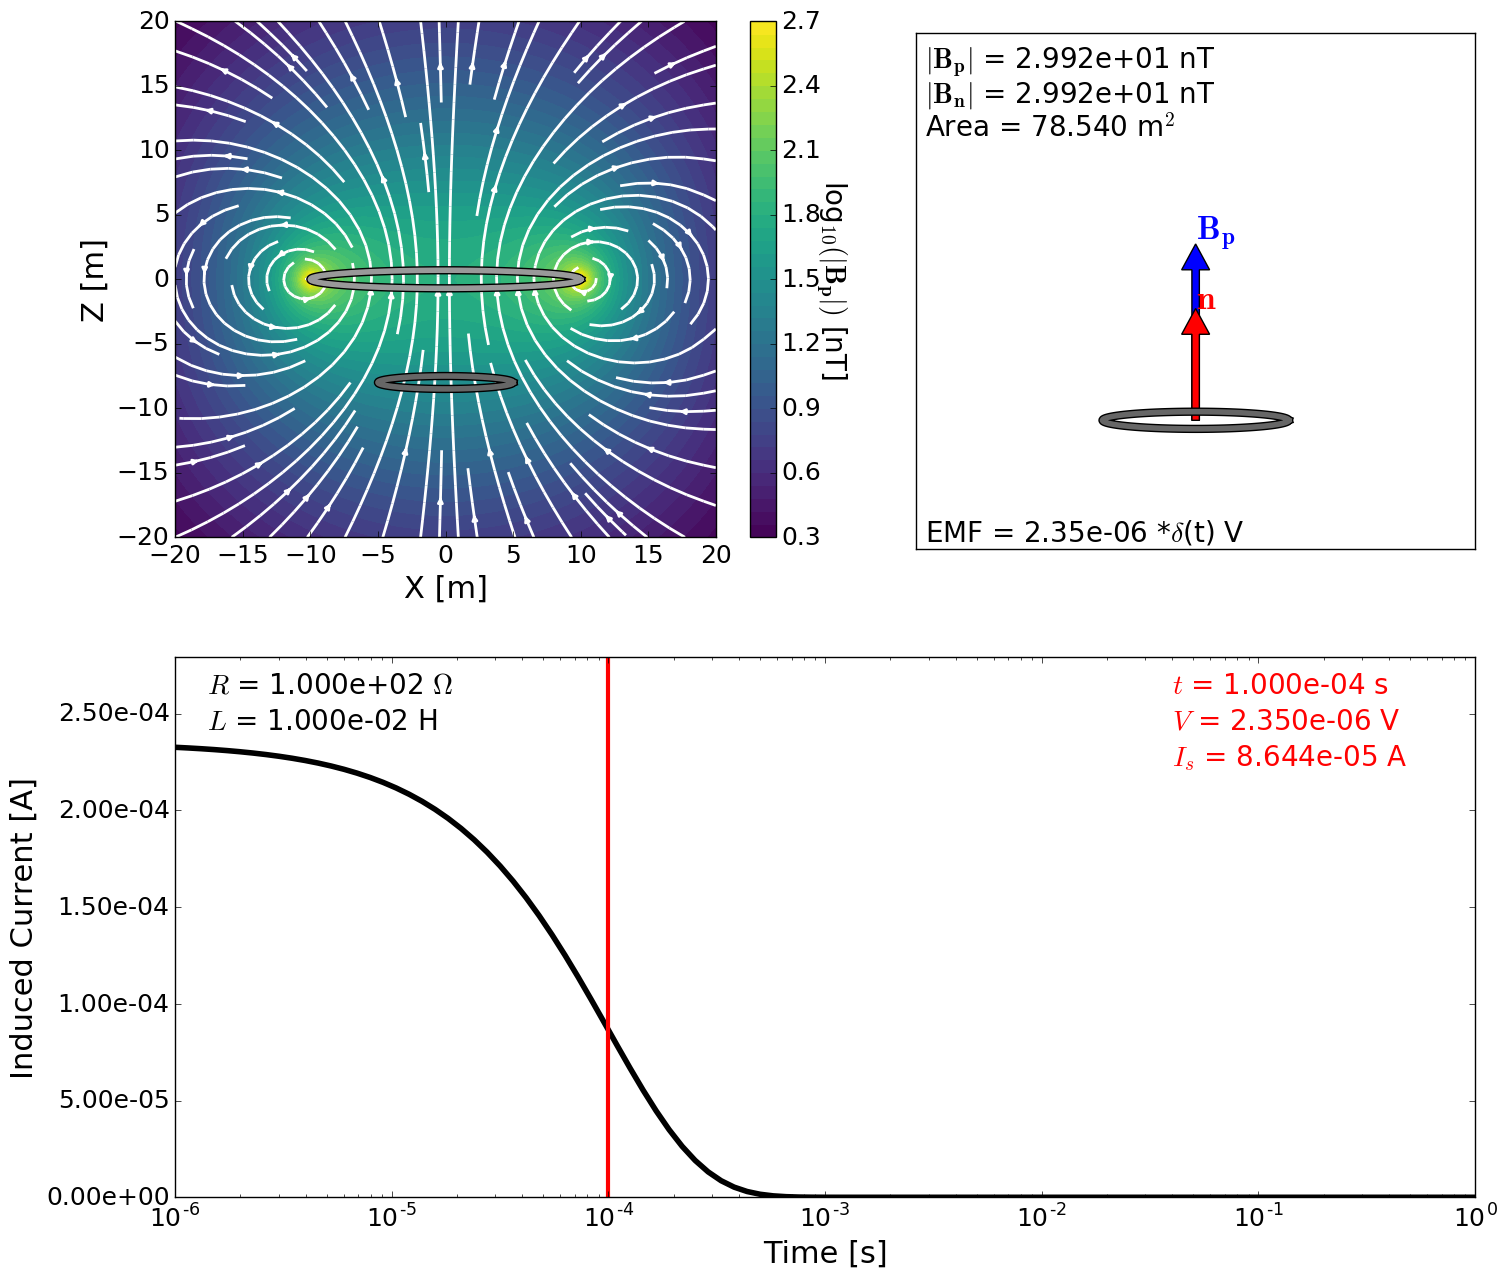

In [2]:
# RUN TRANSIENT WIDGET
widgetify(IND.fcn_TDEM_Widget,I=FloatText(min=0.01,max=100.,value=1.,description = "$I_p$"),\
                        a1=FloatText(min=1.,max=20.,value=10.,description = "$a_{Tx}$"),\
                        a2=FloatText(min=1.,max=20.,value=5.,description = "$a_{Rx}$"),\
                        xRx=FloatText(min=-15.,max=15.,value=0.,description = "$x_{Rx}$"),\
                        zRx=FloatText(min=-15.,max=15.,value=-8.,description = "$z_{Rx}$"),\
                        azm=FloatText(min=-90.,max=90.,value=0.,description = "$\\theta$"),\
                        R=FloatText(min=1e0,max=1e6,value=1e2,description = "$R$"),\
                        L=FloatText(min=1e-7,max=1e-2,value=1e-2,description = "$L$"),\
                        t=FloatText(min=1e-6,max=1e-2,value=1e-4,description = "$t$"))
    